In [1]:
import pandas as pd
import numpy as np
import yfinance as yf

In [2]:
from pmdarima.arima import auto_arima

pmdarima provides a simplified interface for building ARIMA models, including automated hyperparameter tuning.

In [3]:
apple = yf.Ticker("AAPL")

In [4]:
apple_data = apple.history(period="1y")

In [5]:
apple_data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-05-25 00:00:00-04:00,171.499219,172.981338,170.783021,172.076157,56058300,0.0,0.0
2023-05-26 00:00:00-04:00,172.404411,174.841466,172.195514,174.503250,54835000,0.0,0.0
2023-05-30 00:00:00-04:00,176.025173,178.044447,175.637233,176.363373,55964400,0.0,0.0
2023-05-31 00:00:00-04:00,176.393208,178.402541,175.826212,176.313629,99625300,0.0,0.0
2023-06-01 00:00:00-04:00,176.761252,179.168466,175.995316,179.138626,68901800,0.0,0.0
...,...,...,...,...,...,...,...
2024-05-20 00:00:00-04:00,189.330002,191.919998,189.009995,191.039993,44361300,0.0,0.0
2024-05-21 00:00:00-04:00,191.089996,192.729996,190.919998,192.350006,42309400,0.0,0.0
2024-05-22 00:00:00-04:00,192.270004,192.820007,190.270004,190.899994,34648500,0.0,0.0


In [ ]:
# Load/split your data
y = pm.datasets.load_wineind()
train, test = train_test_split(y, train_size=150)

# Fit your model
model = pm.auto_arima(train, seasonal=True, m=12)

# make your forecasts
forecasts = model.predict(test.shape[0])  # predict N steps into the future

# Visualize the forecasts (blue=train, green=forecasts)
x = np.arange(y.shape[0])
plt.plot(x[:150], train, c='blue')
plt.plot(x[150:], forecasts, c='green')
plt.show()

In [6]:
# Auto ARIMA to select optimal ARIMA parameters
model = auto_arima(apple_data['Close'], seasonal=False, trace=True)
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=1152.464, Time=0.09 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=3339.502, Time=0.00 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.01 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=1150.449, Time=0.04 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=inf, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=1148.466, Time=0.03 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=0.06 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1138.691, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1528.713, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1140.190, Time=0.02 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1139.702, Time=0.08 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=1140.502, Time=0.04 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1789.021, Time=0

In [15]:
missing_indices

array(['2023-09-08T00:00:00.000000000', '2022-07-05T00:00:00.000000000',
       '2022-09-16T00:00:00.000000000', '2022-01-14T00:00:00.000000000',
       '2021-06-15T00:00:00.000000000', '2022-08-09T00:00:00.000000000',
       '2022-08-10T00:00:00.000000000', '2022-02-07T00:00:00.000000000',
       '2021-04-13T00:00:00.000000000', '2020-04-14T00:00:00.000000000',
       '2023-07-19T00:00:00.000000000', '2021-06-23T00:00:00.000000000',
       '2023-01-19T00:00:00.000000000', '2021-10-22T00:00:00.000000000',
       '2020-12-23T00:00:00.000000000', '2022-06-06T00:00:00.000000000',
       '2022-10-19T00:00:00.000000000', '2023-11-22T00:00:00.000000000',
       '2021-03-10T00:00:00.000000000', '2020-05-28T00:00:00.000000000'],
      dtype='datetime64[ns]')

In [37]:
np.sort(missing_indices)

array(['2023-01-11T00:00:00.000000000', '2023-01-17T00:00:00.000000000',
       '2023-01-25T00:00:00.000000000', '2023-02-07T00:00:00.000000000',
       '2023-03-30T00:00:00.000000000', '2023-04-11T00:00:00.000000000',
       '2023-05-23T00:00:00.000000000', '2023-06-02T00:00:00.000000000',
       '2023-06-14T00:00:00.000000000', '2023-07-28T00:00:00.000000000',
       '2023-09-18T00:00:00.000000000', '2023-09-22T00:00:00.000000000',
       '2023-09-27T00:00:00.000000000', '2023-10-11T00:00:00.000000000',
       '2023-10-16T00:00:00.000000000', '2023-10-19T00:00:00.000000000',
       '2023-11-10T00:00:00.000000000', '2023-11-22T00:00:00.000000000',
       '2023-12-11T00:00:00.000000000', '2023-12-15T00:00:00.000000000'],
      dtype='datetime64[ns]')

In [31]:
import pandas as pd
import numpy as np
import yfinance as yf
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt

In [32]:
del apple_data

[*********************100%%**********************]  1 of 1 completed
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-01-03  130.279999  130.899994  124.169998  125.070000  124.048042   
2023-01-04  126.889999  128.660004  125.080002  126.360001  125.327515   
2023-01-05  127.129997  127.769997  124.760002  125.019997  123.998451   
2023-01-06  126.010002  130.289993  124.889999  129.619995  128.560867   
2023-01-09  130.470001  133.410004  129.889999  130.149994  129.086517   
...                ...         ...         ...         ...         ...   
2023-12-22  195.179993  195.410004  192.970001  193.600006  193.091385   
2023-12-26  193.610001  193.889999  192.830002  193.050003  192.542816   
2023-12-27  192.490005  193.500000  191.089996  193.149994  192.642548   
2023-12-28  194.139999  194.660004  193.169998  193.580002  193.071426   
2023-12-29  193.899994  194.399994  191.729996  192.529999  192.024185   

               Volume  Close_Orig  Cl

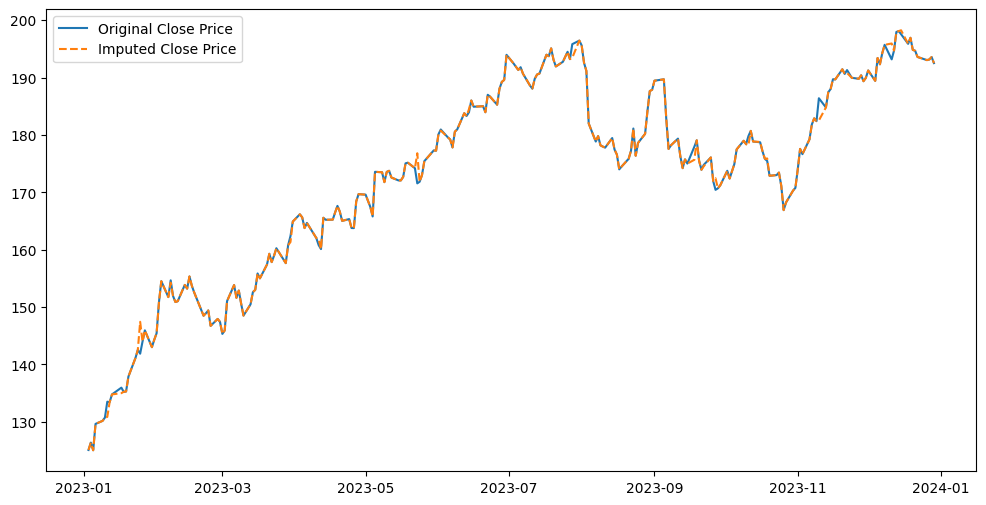

In [33]:
# Step 1: Fetch Apple stock data
ticker = 'AAPL'
apple_data = yf.download(ticker, start='2023-01-01', end='2024-01-01')

# Step 2: Introduce some missing values for demonstration (this step is optional)
np.random.seed(42)  # For reproducibility
missing_indices = np.random.choice(apple_data.index, size=20, replace=False)
apple_data["Close_Orig"] = apple_data.Close
apple_data.loc[missing_indices, 'Close'] = np.nan

# Step 3: Impute missing data using SARIMAX (Seasonal AutoRegressive Integrated Moving Average with eXogenous regressors)

# Step 3.1: Fit the model
model = SARIMAX(apple_data['Close'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12), enforce_stationarity=False, enforce_invertibility=False)
model_fit = model.fit(disp=False)

# Step 3.2: Predict missing values
apple_data['Close_imputed'] = apple_data['Close'].copy()
missing = apple_data['Close'].isna()
apple_data.loc[missing, 'Close_imputed'] = model_fit.predict(start=apple_data.index.min(), end=apple_data.index.max())[missing]

# Display the data with imputed values
print(apple_data)

# Visualize the imputation


plt.figure(figsize=(12, 6))
plt.plot(apple_data['Close_Orig'], label='Original Close Price')
plt.plot(apple_data['Close_imputed'], label='Imputed Close Price', linestyle='--')
plt.legend()
plt.show()

In [46]:
apple_data[apple_data['Close'].isna()]

,Open,High,Low,Close,Adj Close,Volume,Close_Orig,Close_imputed,Close_interpolated
Date,,,,,,,,,
2023-01-11,131.250000,133.509995,130.460007,NaN,132.399261,69458900,133.490005,130.835042,132.070000
2023-01-17,134.830002,137.289993,134.130005,NaN,134.829224,63646600,135.940002,134.982225,134.985001
2023-01-25,140.889999,142.429993,138.809998,NaN,140.700851,65799300,141.860001,147.424716,143.245003
2023-02-07,150.639999,155.229996,150.639999,NaN,153.386337,83322600,154.649994,154.241546,151.824997
2023-03-30,161.529999,162.470001,161.270004,NaN,161.279236,49501700,162.360001,161.326256,162.834999
2023-04-11,162.350006,162.360001,160.509995,NaN,159.729614,47644200,160.800003,161.839969,161.065002
2023-05-23,173.130005,173.380005,171.279999,NaN,170.653702,50747300,171.559998,176.808616,173.019997
2023-06-02,181.029999,181.779999,179.259995,NaN,179.994095,61945900,180.949997,180.760060,179.834999
2023-06-14,183.369995,184.389999,182.020004,NaN,182.978241,57462900,183.949997,184.475768,184.659996


In [44]:
apple_data['Close_interpolated'] = apple_data['Close'].interpolate(method='linear')

In [45]:
apple_data

,Open,High,Low,Close,Adj Close,Volume,Close_Orig,Close_imputed,Close_interpolated
Date,,,,,,,,,
2023-01-03,130.279999,130.899994,124.169998,125.070000,124.048042,112117500,125.070000,125.070000,125.070000
2023-01-04,126.889999,128.660004,125.080002,126.360001,125.327515,89113600,126.360001,126.360001,126.360001
2023-01-05,127.129997,127.769997,124.760002,125.019997,123.998451,80962700,125.019997,125.019997,125.019997
2023-01-06,126.010002,130.289993,124.889999,129.619995,128.560867,87754700,129.619995,129.619995,129.619995
2023-01-09,130.470001,133.410004,129.889999,130.149994,129.086517,70790800,130.149994,130.149994,130.149994
...,...,...,...,...,...,...,...,...,...
2023-12-22,195.179993,195.410004,192.970001,193.600006,193.091385,37122800,193.600006,193.600006,193.600006
2023-12-26,193.610001,193.889999,192.830002,193.050003,192.542816,28919300,193.050003,193.050003,193.050003
2023-12-27,192.490005,193.500000,191.089996,193.149994,192.642548,48087700,193.149994,193.149994,193.149994


<Axes: xlabel='Date'>

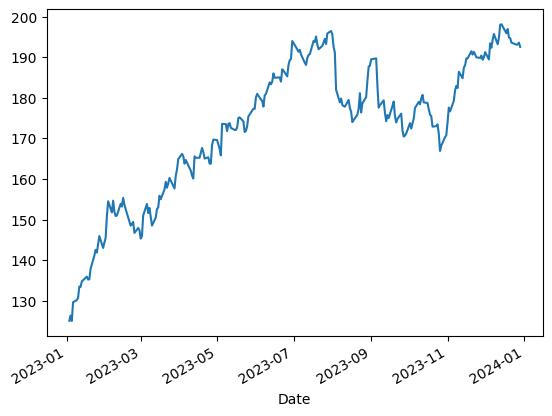

In [26]:
apple_data.Close_Orig.plot()

<Axes: xlabel='Date'>

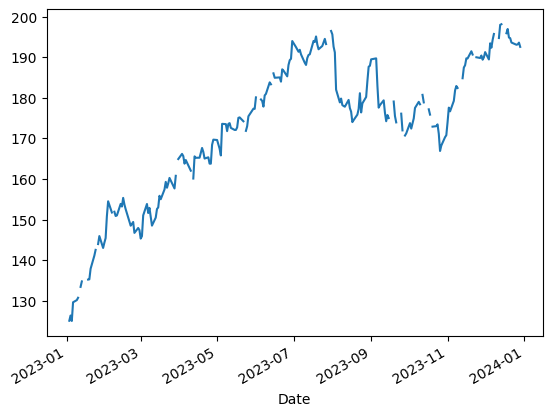

In [27]:
apple_data.Close.plot()

<Axes: xlabel='Date'>

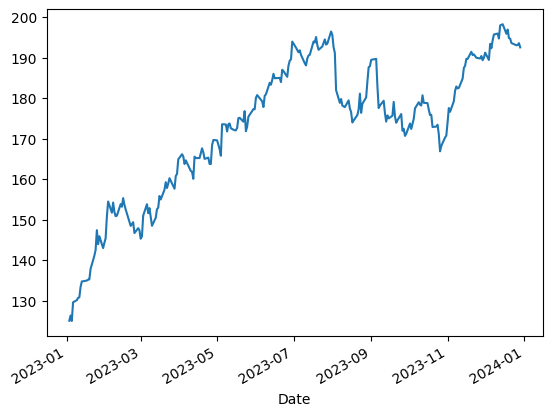

In [28]:
apple_data.Close_imputed.plot()

In [12]:
from sklearn.metrics import mean_squared_error

In [47]:
print(mean_squared_error(apple_data.Close_interpolated, apple_data.Close_Orig))

0.13905209719482808


In [34]:
print(mean_squared_error(apple_data.Close_imputed, apple_data.Close_Orig))

0.4411914030426249


In [22]:
print(mean_squared_error(apple_data.Close_imputed, apple_data.Close_Orig))

0.050398917382823656


<Axes: xlabel='Date'>

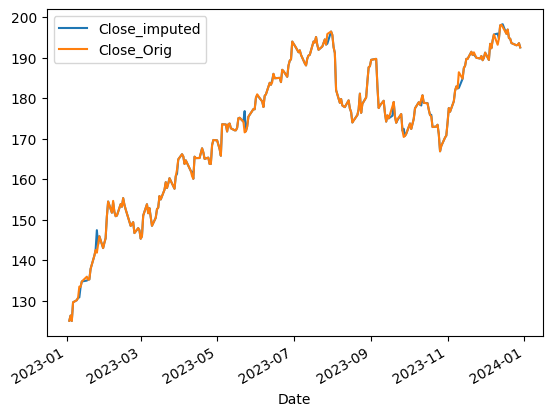

In [30]:
apple_data[["Close_imputed", "Close_Orig"]].plot()

In [66]:
del apple_data
# Step 1: Fetch Apple stock data
ticker = 'AAPL'
apple_data = yf.download(ticker, start='2023-01-01', end='2024-01-01')

[*********************100%%**********************]  1 of 1 completed


In [67]:
apple_data["Close_Orig"] = apple_data.Close

In [68]:
# Step 2: Introduce some missing values for demonstration (this step is optional)
# np.random.seed(42)  # For reproducibility
# missing_indices = np.random.choice(apple_data.index, size=20, replace=False)
# apple_data.loc[missing_indices, 'Close'] = np.nan

apple_data["Close"].iloc[200:205] = np.nan

/var/folders/xf/nrh10nbn72g0qqwyvykmn5qh0000gp/T/ipykernel_38578/413128431.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apple_data["Close"].iloc[200:205] = np.nan


In [69]:
apple_data[apple_data.Close.isna()]

,Open,High,Low,Close,Adj Close,Volume,Close_Orig
Date,,,,,,,
2023-10-19,176.039993,177.839996,175.190002,NaN,174.768799,59302900,175.460007
2023-10-20,175.309998,175.419998,172.639999,NaN,172.198959,64189300,172.880005
2023-10-23,170.910004,174.009995,169.929993,NaN,172.318481,55980100,173.000000
2023-10-24,173.050003,173.669998,171.449997,NaN,172.756744,43816600,173.440002
2023-10-25,171.880005,173.059998,170.649994,NaN,170.425980,57157000,171.100006


In [70]:
from statsmodels.tsa.arima.model import ARIMA

In [73]:
help(model_fit.get_forecast())

AttributeError: 'function' object has no attribute 'get_forecast'

In [77]:
# Step 3: Impute missing data using SARIMAX (Seasonal AutoRegressive Integrated Moving Average with eXogenous regressors)

# Step 3.1: Fit the model
model = ARIMA(apple_data['Close'], order=(2, 0, 0))#, seasonal_order=(1, 1, 1, 12), enforce_stationarity=False, enforce_invertibility=False)
model_fit = model.fit()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [78]:
model_fit.get_forecast(steps=20)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [75]:
model_fit.get_forecast()

AttributeError: 'function' object has no attribute 'get_forecast'

In [72]:


# Step 3.2: Predict missing values
apple_data['Close_imputed'] = apple_data['Close'].copy()
missing = apple_data['Close'].isna()
apple_data.loc[missing, 'Close_imputed'] = model_fit.predict(start=apple_data.index.min(), end=apple_data.index.max())[missing]

# Display the data with imputed values
print(apple_data)

# Visualize the imputation


plt.figure(figsize=(12, 6))
plt.plot(apple_data['Close_Orig'], label='Original Close Price')
plt.plot(apple_data['Close_imputed'], label='Imputed Close Price', linestyle='--')
plt.legend()
plt.show()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


AttributeError: 'function' object has no attribute 'predict'

In [59]:
apple_data['Close_interpolated'] = apple_data['Close'].interpolate(method='linear')

In [60]:
apple_data

,Open,High,Low,Close,Adj Close,Volume,Close_Orig,Close_imputed,Close_interpolated
Date,,,,,,,,,
2023-01-03,130.279999,130.899994,124.169998,125.070000,124.048042,112117500,125.070000,125.070000,125.070000
2023-01-04,126.889999,128.660004,125.080002,126.360001,125.327515,89113600,126.360001,126.360001,126.360001
2023-01-05,127.129997,127.769997,124.760002,125.019997,123.998451,80962700,125.019997,125.019997,125.019997
2023-01-06,126.010002,130.289993,124.889999,129.619995,128.560867,87754700,129.619995,129.619995,129.619995
2023-01-09,130.470001,133.410004,129.889999,130.149994,129.086517,70790800,130.149994,130.149994,130.149994
...,...,...,...,...,...,...,...,...,...
2023-12-22,195.179993,195.410004,192.970001,193.600006,193.091385,37122800,193.600006,193.600006,193.600006
2023-12-26,193.610001,193.889999,192.830002,193.050003,192.542816,28919300,193.050003,193.050003,193.050003
2023-12-27,192.490005,193.500000,191.089996,193.149994,192.642548,48087700,193.149994,193.149994,193.149994


In [62]:
imputed_dataset = apple_data[apple_data.Close.isna()]
imputed_dataset

,Open,High,Low,Close,Adj Close,Volume,Close_Orig,Close_imputed,Close_interpolated
Date,,,,,,,,,
2023-10-19,176.039993,177.839996,175.190002,NaN,174.768799,59302900,175.460007,176.196816,174.348330
2023-10-20,175.309998,175.419998,172.639999,NaN,172.198959,64189300,172.880005,176.997166,172.856664
2023-10-23,170.910004,174.009995,169.929993,NaN,172.318481,55980100,173.000000,177.316258,171.364998
2023-10-24,173.050003,173.669998,171.449997,NaN,172.756744,43816600,173.440002,177.014312,169.873332
2023-10-25,171.880005,173.059998,170.649994,NaN,170.425980,57157000,171.100006,177.235292,168.381666


In [63]:
print(mean_squared_error(imputed_dataset.Close_interpolated, imputed_dataset.Close_Orig))
print(mean_squared_error(imputed_dataset.Close_imputed, imputed_dataset.Close_Orig))

4.80402340234853
17.3082808228734


[*********************100%%**********************]  1 of 1 completed
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/var/folders/xf/nrh10nbn72g0qqwyvykmn5qh0000gp/T/ipykernel_38578/642823486.py:30: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  data[i] = forecast[0]
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.1

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-01-03  130.279999  130.899994  124.169998  125.070000  124.048042   
2023-01-04  126.889999  128.660004  125.080002  126.360001  125.327515   
2023-01-05  127.129997  127.769997  124.760002  125.019997  123.998451   
2023-01-06  126.010002  130.289993  124.889999  129.619995  128.560867   
2023-01-09  130.470001  133.410004  129.889999  130.149994  129.086517   
...                ...         ...         ...         ...         ...   
2023-12-22  195.179993  195.410004  192.970001  193.600006  193.091385   
2023-12-26  193.610001  193.889999  192.830002  193.050003  192.542816   
2023-12-27  192.490005  193.500000  191.089996  193.149994  192.642548   
2023-12-28  194.139999  194.660004  193.169998  193.580002  193.071426   
2023-12-29  193.899994  194.399994  191.729996  192.529999  192.024185   

               Volume  Close_Orig  Cl

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


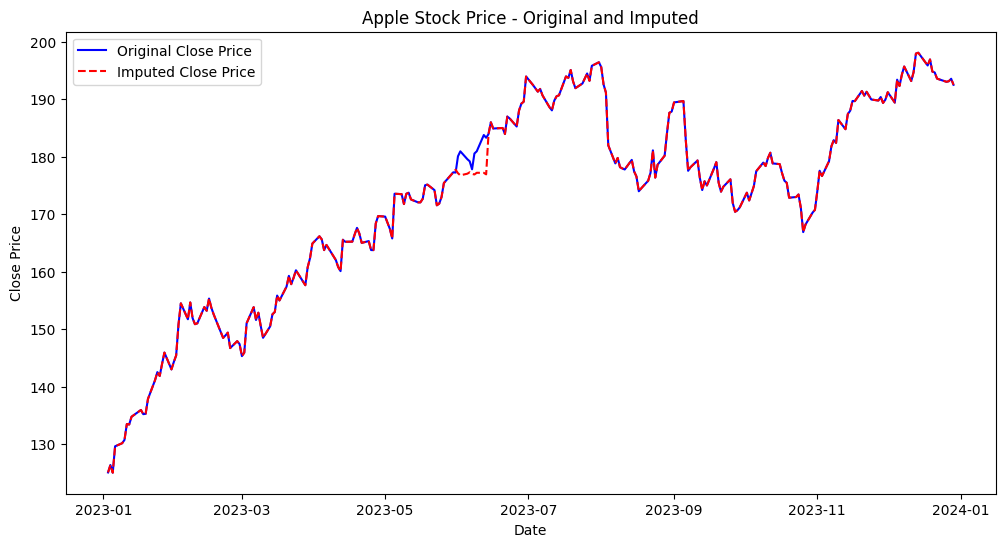

In [89]:
del apple_data
# Step 1: Fetch Apple stock data
ticker = 'AAPL'
apple_data = yf.download(ticker, start='2023-01-01', end='2024-01-01')
apple_data["Close_Orig"] = apple_data.Close

# Step 2: Introduce 10 consecutive missing values for demonstration
np.random.seed(42)  # For reproducibility
start_missing = np.random.randint(0, len(apple_data) - 10)
apple_data.loc[apple_data.index[start_missing:start_missing + 10], 'Close'] = np.nan

# Step 3: Impute missing data using ARIMA

# Function to fill missing values using ARIMA
def fill_missing_arima(data):
    missing_indices = np.where(data.isna())[0]
    
    # Fit ARIMA model on non-missing data
    model = ARIMA(np.array(data.dropna()), order=(5, 1, 3))  # Example order; adjust as needed
    model_fit = model.fit()
    
    # Predict missing values
    for i in missing_indices:
        # Update the model with the latest available data
        model = ARIMA(np.array(data[:i].dropna()), order=(5, 1, 3))
        model_fit = model.fit()
        
        # Forecast the next value
        forecast = model_fit.forecast(steps=1)
        data[i] = forecast[0]
    
    return data

# Apply the function to impute missing values
apple_data['Close_imputed'] = fill_missing_arima(apple_data['Close'].copy())

# Display the data with imputed values
print(apple_data)

# If you want to visualize the imputation
plt.figure(figsize=(12, 6))
plt.plot(apple_data['Close_Orig'], label='Original Close Price', color='blue')
plt.plot(apple_data['Close_imputed'], label='Imputed Close Price', linestyle='--', color='red')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Apple Stock Price - Original and Imputed')
plt.show()